In [1]:
"""
Extra Two-Body System Analysis
Investigating the central mass in Omega Centauri
Modelling of individual stellar orbits with distributions of orbital parameters
See Also: Octofitter
https://github.com/sefffal/octofitterpy
"""

'\nTwo-Body System Analysis\nInvestigating the central mass in Omega Centauri\n'

In [1]:
import numpy as np
import matplotlib.colorbar as colorbar
import matplotlib.pylab as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import astropy.units as u
import astropy.constants as const
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
from astropy.table import Table
from datetime import datetime
from scipy import stats
from PyAstronomy import pyasl

import sys
sys.path
sys.path.append(r"C:\Users\macke\OneDrive - Saint Marys University\Summer Research 2025\two_body\orbit_utilities")
print(sys.path)
import two_body_utils as utils

['C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\two_body', 'C:\\Users\\macke\\anaconda3\\python312.zip', 'C:\\Users\\macke\\anaconda3\\DLLs', 'C:\\Users\\macke\\anaconda3\\Lib', 'C:\\Users\\macke\\anaconda3', '', 'C:\\Users\\macke\\anaconda3\\Lib\\site-packages', 'C:\\Users\\macke\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\macke\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\macke\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\macke\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor', 'C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\two_body\\orbit_utilities']


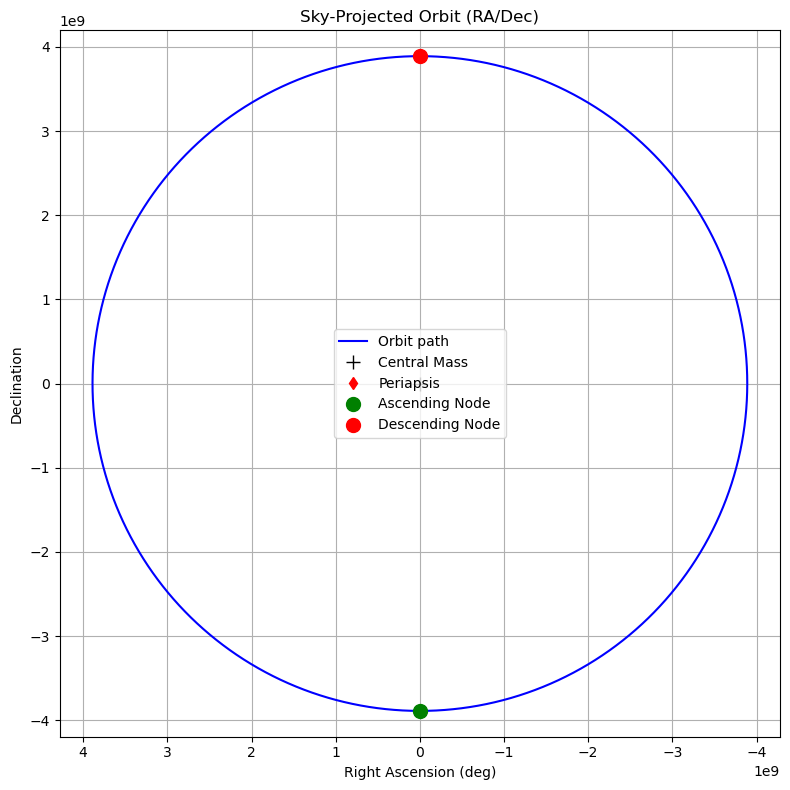

In [3]:
"""
Orbit Calculations and Plots with Relative KeplerElipse RA and DEC
"""

# ========================================================
# 1. Set Orbital Parameters
# ========================================================
e = 0                        # Eccentricity
a = utils.semi_major_sample.value       # Semi-major axis
per = utils.circular_period(semi_major=utils.semi_major_sample, speed=utils.v_xyz_sample).value    # Period
tau = utils.tau               # Time of periapsis
Omega = utils.Omega           # Longitude of ascending node (deg)
w = utils.w                   # Argument of periapsis (deg)
i = utils.i                   # Inclination (deg)

# Time array over one period (in seconds)
t = np.linspace(tau, tau + per, utils.n_int)

# ========================================================
# 2. Instantiate Orbit and Compute Positions
# ========================================================
ke = pyasl.KeplerEllipse(a=a, per=per, e=e, Omega=Omega, i=i, w=w)

# Position as a function of time (in 3D)
pos = ke.xyzPos(t)

# Nodes for observer at -z
ascn, descn = ke.xyzNodes_LOSZ()

# ========================================================
# 3. Plot Orbit (RA vs Dec)
# ========================================================
fig, ax = plt.subplots(figsize=(8, 8))

# Plot orbital trajectory in RA-Dec plane
# Convention: RA increases to the left (east), Dec increases up (north)
ax.plot(-pos[:, 1], pos[:, 0], 'b-', label='Orbit path')  # -RA vs Dec

# Central mass
ax.plot(0, 0, 'k+', markersize=10, label='Central Mass')

# Periapsis
ax.plot(-pos[0, 1], pos[0, 0], 'rd', label='Periapsis')

# Nodes
ax.plot(-ascn[1], ascn[0], 'go', markersize=10, label='Ascending Node')
ax.plot(-descn[1], descn[0], 'ro', markersize=10, label='Descending Node')

# ========================================================
# 4. Format Sky Plot
# ========================================================
ax.set_title("Sky-Projected Orbit (RA/Dec)")
ax.set_xlabel("Right Ascension (deg)")        # East to the left
ax.set_ylabel("Declination")            # North up
ax.invert_xaxis()                       # Standard astronomical RA direction
ax.axis('equal')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


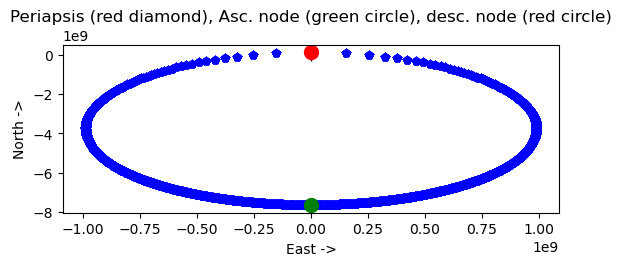

In [5]:
"""
#Single Orbital Plot
"""

# Get a sample period in seconds
per_sample = utils.circular_period(semi_major = utils.semi_major_sample, speed = utils.v_xyz_sample) 

#Calculate a single orbit -- No units in arguments
kes = pyasl.KeplerEllipse(a = utils.semi_major_sample.value, per= per_sample.value, e = utils.e[0], Omega= utils.Omega, 
                             i= utils.i, w=utils.w)

# Get a time axis
# No units in arguments
# np.linspace(start,stop,num)
t = np.linspace(utils.tau, per_sample.value, utils.n_int) * 86400

# Calculate the orbit position at the given points in a Cartesian coordinate system.
pos = kes.xyzPos(t)

# Calculate the orbit radius 
radius = kes.radius(t)

# Calculate velocity on orbit
vel = kes.xyzVel(t)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = kes.xyzNodes_LOSZ()
# Plot x and y coordinates of the orbit
plt.subplot(2, 1, 1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::, 1], pos[::, 0], 'bp')
# Point of periapsis
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)

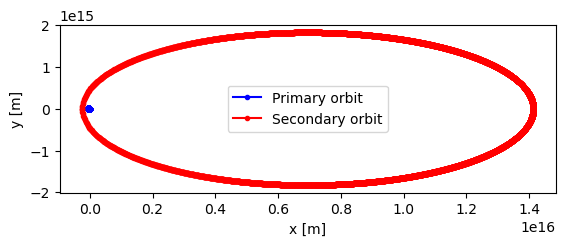

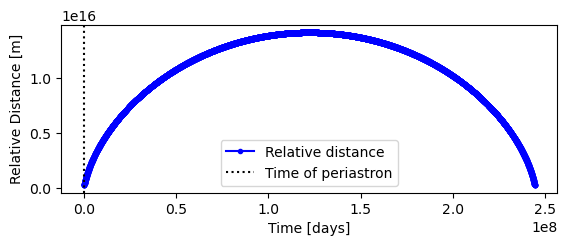

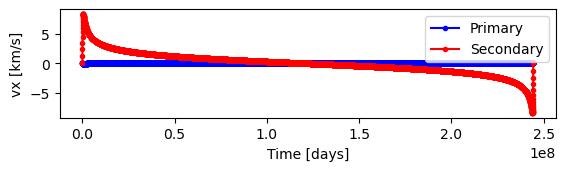

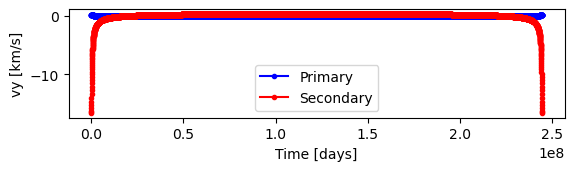

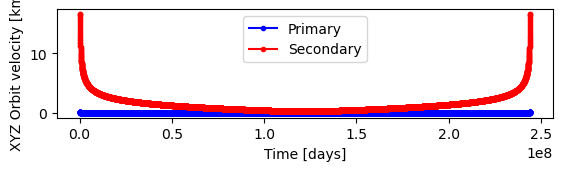

In [7]:

"""
#Single Binary Orbit Plots
"""


# Get a sample period in seconds
per_sample = utils.circular_period(semi_major = utils.semi_major_sample, speed = utils.v_xyz_sample) 

# Calculate a single binary orbit
# no units in arguments 
bo = pyasl.BinaryOrbit(utils.m2m1, utils.mtot, per_sample.value, utils.e[0], 
                       utils.tau, utils.Omega, utils.w, utils.i)

# Get a time axis
# No units in arguments!
# np.linspace(start,stop,num)
t = np.linspace(utils.tau, per_sample.value, utils.n_int) * 86400

# Calculate primary and secondary orbit
ke1 = bo.getKeplerEllipse_primary()
ke2 = bo.getKeplerEllipse_secondary()

# velocities and radii of single orbit
r1s, r2s = bo.xyzPos(t)
v1s, v2s = bo.xyzVel(t)

# Relative distance of masses (centers) of single orbit
rds = np.sqrt(np.sum((r1s-r2s)**2, axis=1))

#Plot binary orbit
plt.subplot(2,1,1)
plt.plot(r1s[::,0], r1s[::,1], 'b.-', label="Primary orbit")
plt.plot(r2s[::,0], r2s[::,1], 'r.-', label="Secondary orbit")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()
print()
print()

#Plot relative distances
plt.subplot(2,1,2)
plt.plot(t/86400, rds, 'b.-', label="Relative distance")
plt.axvline(utils.tau, ls=':', c='k', label="Time of periastron")
plt.xlabel("Time [days]")
plt.ylabel("Relative Distance [m]")
plt.legend()
plt.show()
print()
print()

# plot x-velocity
plt.subplot(3,1,1)
plt.plot(t/86400, v1s[::,0]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2s[::,0]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vx [km/s]")
plt.legend()
plt.show()
print()

# plot y-velocity
plt.subplot(3,1,2)
plt.plot(t/86400, v1s[::,1]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2s[::,1]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vy [km/s]")
plt.legend()
plt.show()
print()

# plot orbit velocities
plt.subplot(3,1,3)
ov1s = np.sqrt(np.sum(v1s**2, axis=1))
ov2s = np.sqrt(np.sum(v2s**2, axis=1))
plt.plot(t/86400, ov1s/1e3, 'b.-', label="Primary")
plt.plot(t/86400, ov2s/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("XYZ Orbit velocity [km/s]")
plt.legend()
plt.show()


In [9]:
# """
# Binary System Calculations with KeplerEllipse 
# """
# eccentricities 
# 100 random eccentricities from the thermal distribution 
# The CDF (F(e)) gives probability
# The inverse CDF turns uniform random samples into samples that match probability density
# f(e) = 2e, so more eccentric orbits are more likely than circular
# u=F(e)=e, each proability value is equally likely and maps to some value of e 
p = np.random.uniform(0, 1, utils.n_int)
ecc_distribution_ke = np.sqrt(p)

#Solver for Kepler's equation
# Solves Kepler's Equation for a set
# of mean anomaly and eccentricity.
ks = pyasl.MarkleyKESolver()
print("Eccentric anomalies: \n",ks.getE(utils.M, ecc_distribution_ke))

# # Get a sample period in seconds
per_sample = utils.circular_period(semi_major = utils.semi_major_sample, speed = utils.v_xyz_sample) 

# Get a time axis of units based on input
# No units in arguments
# np.linspace(start,stop,num)
t = np.linspace(utils.tau, per_sample.value, utils.n_int)

# Initialize empty arrays 
positions = np.zeros((len(ecc_distribution_ke), len(t), 3))  
velocities = np.zeros_like(positions)
radii = np.zeros((len(ecc_distribution_ke), len(t)))

# Loop over each eccentricity and timestep and calculate position, velocity, radius
for k, e_val in enumerate(ecc_distribution_ke):
     # Calculate the ellipse for each value of eccentricity --- No units in arguments! -- output units depend on input
      ke = pyasl.KeplerEllipse(a = utils.semi_major_sample.value, per = per_sample.value, e = e_val, Omega= utils.Omega, 
                               i= utils.i, w=utils.w)

      for j, time in enumerate(t):
          positions[k, j] = ke.xyzPos(time)
          velocities[k, j] = ke.xyzVel(time)
          radii[k, j] = ke.radius(time)

# Get magnitudes of xyz velocities
velocities_magnitudes = np.linalg.norm(velocities[:,:, :2], axis=2) 

# Print results
print("\nShape of output array: ", positions.shape, "\n")
print("Units of output correspond to input:",utils.semi_major_sample.unit,"and", per_sample.unit, "\n")
print("x, y, z velocities for the", utils.n_int, "timesteps and eccentricites: \n", velocities[:,:, :: ])
print("\n\nCorresponding Magnitudes:\n", velocities_magnitudes)

Eccentric anomalies: 
 [1.36002432 1.4871255  1.45353287 0.98158796 1.32882147]

Shape of output array:  (5, 5, 3) 

Units of output correspond to input: km and s 

x, y, z velocities for the 5 timesteps and eccentricites: 
 [[[-2.07767737e+02  1.27221047e-14  0.00000000e+00]
  [ 3.02805219e+01 -6.51858591e+01 -0.00000000e+00]
  [ 4.81306682e+01 -1.04888721e-14 -0.00000000e+00]
  [ 3.02805219e+01  6.51858591e+01  0.00000000e+00]
  [-2.07767737e+02  1.27221047e-14  0.00000000e+00]]

 [[-2.58531126e+02  1.58304658e-14  0.00000000e+00]
  [ 2.70050953e+01 -5.77375605e+01 -0.00000000e+00]
  [ 3.86800620e+01 -9.40783064e-15 -0.00000000e+00]
  [ 2.70050953e+01  5.77375605e+01  0.00000000e+00]
  [-2.58531126e+02  1.58304658e-14  0.00000000e+00]]

 [[-2.42046656e+02  1.48210831e-14  0.00000000e+00]
  [ 2.81377406e+01 -5.96666907e+01 -0.00000000e+00]
  [ 4.13143490e+01 -9.69816803e-15 -0.00000000e+00]
  [ 2.81377406e+01  5.96666907e+01  0.00000000e+00]
  [-2.42046656e+02  1.48210831e-14  0.00000